In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
src_images = os.listdir("images/")

In [107]:
img = cv2.imread("images/8.jpg")

In [108]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Image Dimensions :: (900, 1600, 3)


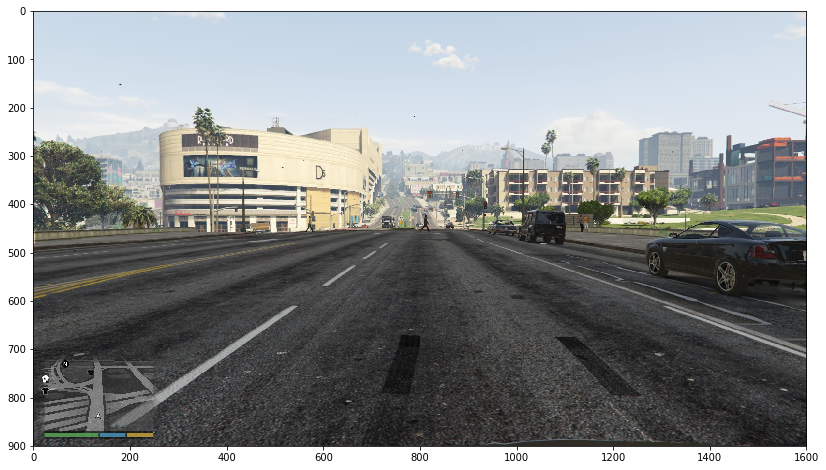

In [109]:
plt.figure(figsize=(15,8))
print("Image Dimensions :: {}".format(img.shape))
plt.imshow(img)

In [110]:
# CONVERTS 3 CHANNEL IMAGE TO SINGLE CHANNEL
def get_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

Image Dimensions :: (900, 1600)


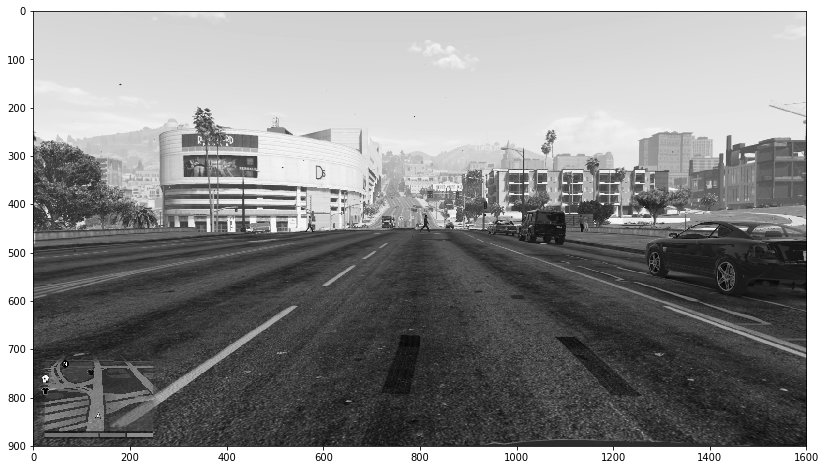

In [111]:
gray_img = get_gray(img)
plt.figure(figsize=(15,8))
print("Image Dimensions :: {}".format(gray_img.shape))
plt.imshow(gray_img, cmap='gray')

In [112]:
# show canny image
def canny_img(img, low_threshold, high_treshold):
    return cv2.Canny(img, low_threshold, high_treshold)

Image Dimensions :: (900, 1600)


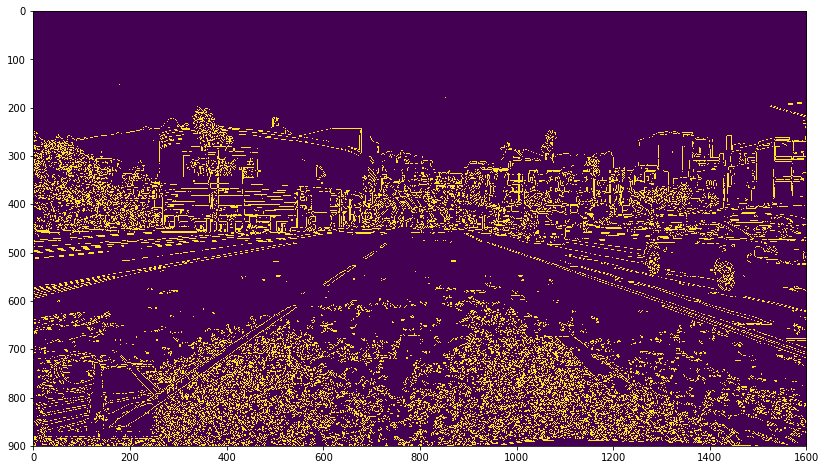

In [113]:
c_img = canny_img(gray_img, 50,150)
plt.figure(figsize=(15,8))
print("Image Dimensions :: {}".format(c_img.shape))
plt.imshow(c_img)

In [114]:
def gaussian_blur(img, kernelsize):
    return cv2.GaussianBlur(img, (kernelsize, kernelsize),0)

Image Dimensions :: (900, 1600)


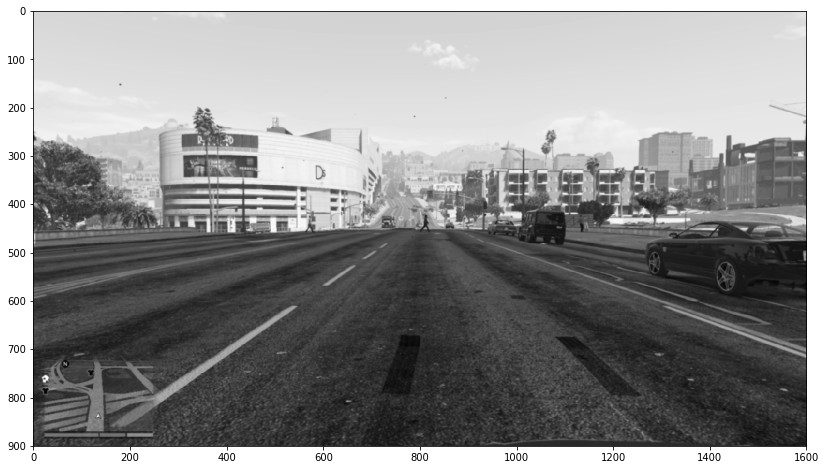

In [115]:
gsblur = gaussian_blur(gray_img, 5)
plt.figure(figsize=(15,8))
print("Image Dimensions :: {}".format(gsblur.shape))
plt.imshow(gsblur, cmap='gray')

Image Dimensions :: (900, 1600)


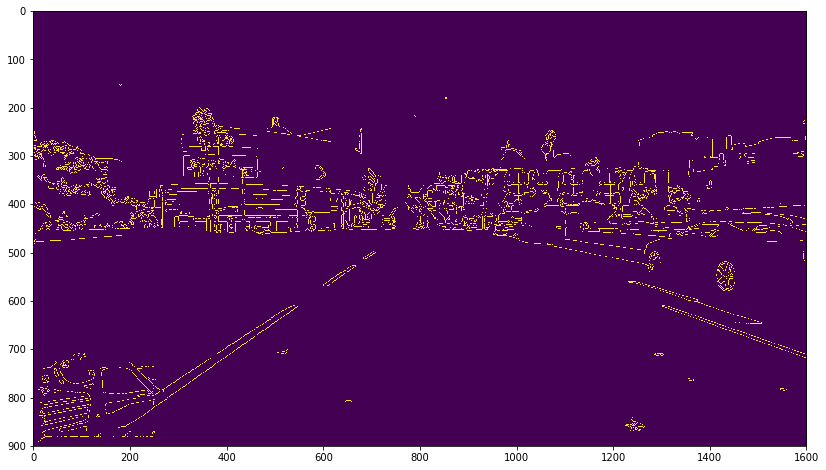

In [116]:
c2_img = canny_img(gsblur, 50,250)
plt.figure(figsize=(15,8))
print("Image Dimensions :: {}".format(c2_img.shape))
plt.imshow(c2_img)

Image Dimensions :: (900, 1600, 3)


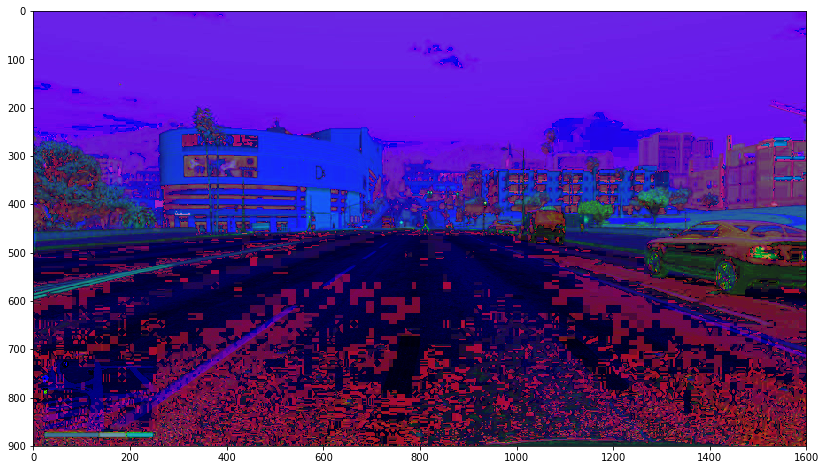

In [117]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.figure(figsize=(15,8))
print("Image Dimensions :: {}".format(img_hsv.shape))
plt.imshow(img_hsv)

In [118]:
lower_yellow = np.array([20, 100, 100], dtype = "uint8")
upper_yellow = np.array([30, 255, 255], dtype="uint8")

In [119]:
msk_yellow = cv2.inRange(img_hsv, lower_yellow, upper_yellow)

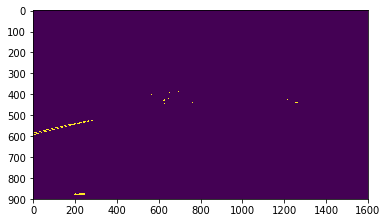

In [120]:
plt.imshow(msk_yellow)

In [121]:
msk_white = cv2.inRange(gray_img, 200, 255)

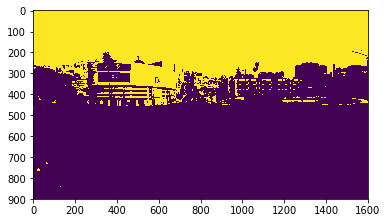

In [122]:
plt.imshow(msk_white)

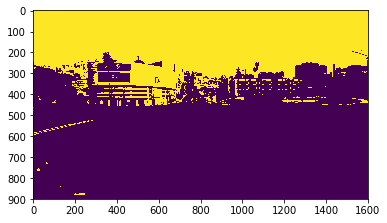

In [123]:
mask_yw = cv2.bitwise_or(msk_white, msk_yellow)
plt.imshow(mask_yw)

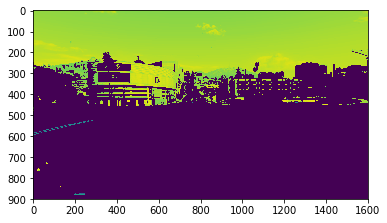

In [124]:
mask_yw_image = cv2.bitwise_and(gray_img, mask_yw)
plt.imshow(mask_yw_image)

Image Dimensions :: (900, 1600)


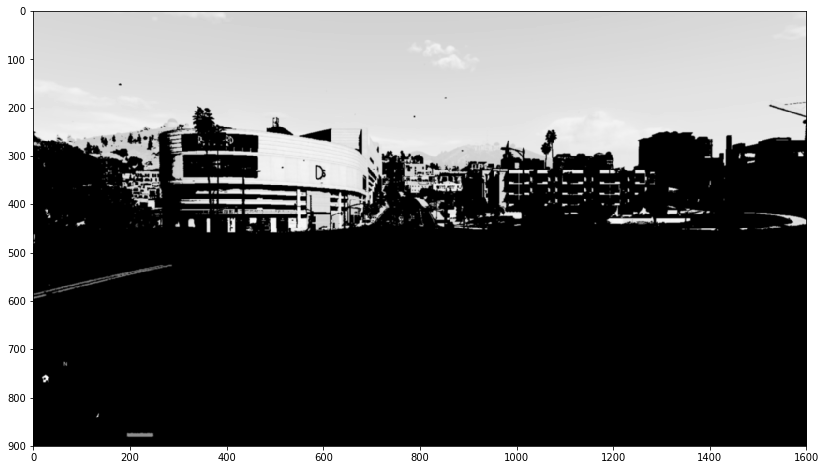

In [125]:
gsblur2 = gaussian_blur(mask_yw_image, 5)
plt.figure(figsize=(15,8))
print("Image Dimensions :: {}".format(gsblur2.shape))
plt.imshow(gsblur2, cmap='gray')

Image Dimensions :: (900, 1600)


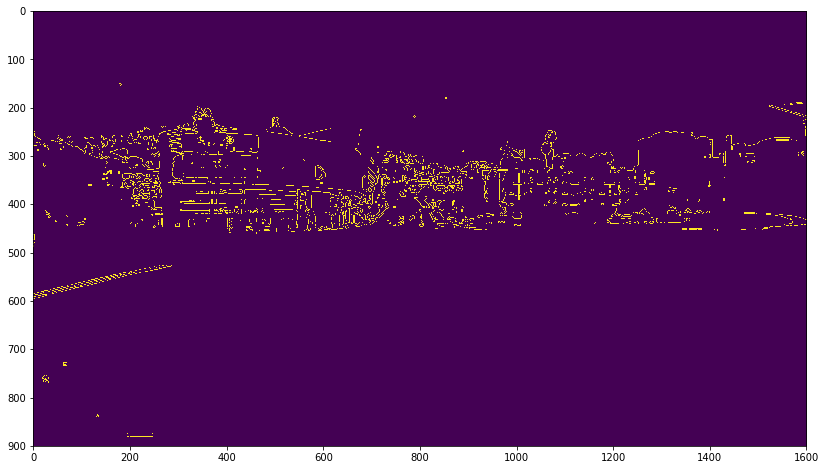

In [126]:
c2_img2 = canny_img(gsblur2, 50,150)
plt.figure(figsize=(15,8))
print("Image Dimensions :: {}".format(c2_img2.shape))
plt.imshow(c2_img2)